# Imports

In [1]:
import os
import cv2
import numpy as np
import pytesseract
from matplotlib import pyplot as plt

# Tesseract path

In [2]:
tesseract_path = "C:/Program Files/Tesseract-OCR/tesseract.exe"
pytesseract.pytesseract.tesseract_cmd = tesseract_path

# Read image

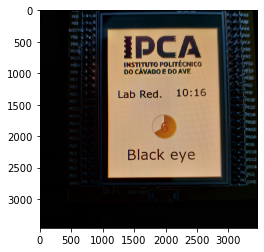

In [204]:
folder = 'dataset'
file = 'Black eye_1.jpg'

#folder = 'old_pictures/Old_Layout_Dataset'
#file = 'ui_andromeda_1.jpg'

img = cv2.imread(os.path.join(folder, file))
plt.imshow(img)

# Convert to grayscale

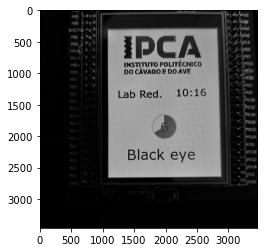

In [205]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')

# Convert to binary with OTSU method

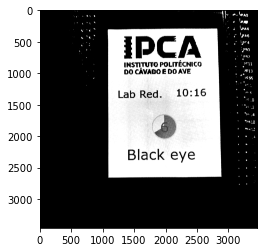

In [206]:
_, img_th1 = cv2.threshold(img_gray, 0, 255, cv2.THRESH_OTSU)
plt.imshow(img_th1, cmap='gray')

# Find screen

In [207]:
# Find biggest contour (screen)
contours, _ = cv2.findContours(img_th1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
biggest_contour = max(contours, key=cv2.contourArea)
# Get bounding box around screen
x, y, w, h = cv2.boundingRect(biggest_contour)
print(f'Screen coordinates: {(x, y), (x+w, y+h)}')

Screen coordinates: ((1072, 291), (2880, 2662))


# Fill the outside of contours

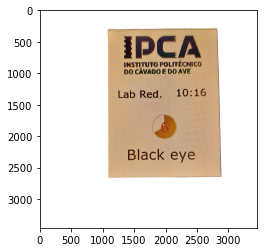

In [208]:
img2 = img.copy()

# Color that will fill image
fill_color = [255, 255, 255] # White
mask_value = 255 # Can be any color, exept black (0)

# Create stencil with the same dimensions as original image but only 1 channel
stencil  = np.zeros(img2.shape[:-1]).astype(np.uint8)
cv2.fillPoly(stencil, [biggest_contour], mask_value)

# Select everything that is not mask_value
selected = stencil != mask_value
# Fill it with fill_color
img2[selected] = fill_color

plt.imshow(img2)

# Get region of interest

(2371, 1808, 3)


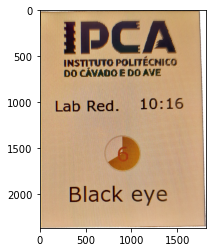

In [209]:
img_roi = img2[y:y+h, x:x+w]
plt.imshow(img_roi)
print(img_roi.shape)

# Resize image

In [210]:
# resize image
img_resized = cv2.resize(img_roi, (640, 860), interpolation=cv2.INTER_AREA)
print(img_resized.shape)

(860, 640, 3)


# Convert to grayscale

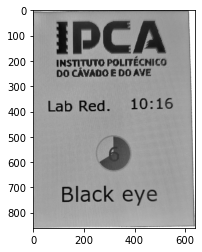

In [211]:
img_roi_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
plt.imshow(img_roi_gray, cmap='gray')

# Threshold with OTSU and invert image 

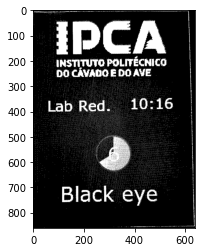

In [212]:
_, img_th2 = cv2.threshold(img_roi_gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
plt.imshow(img_th2, cmap='gray')


# Delete Noise and get contours

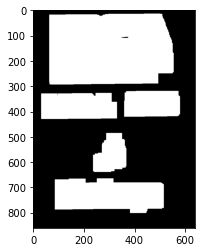

In [213]:
# Create kernel for Erosion
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

# Applying Erosion on the threshold image
img_erode = cv2.erode(img_th2, rect_kernel)

# Create kernel Dilatation
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (63, 63))
# Applying dilation on the threshold image
img_dilated = cv2.dilate(img_erode, rect_kernel)

#Calculate Again Contours
contours, _ = cv2.findContours(img_dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
biggest_contour = max(contours, key=cv2.contourArea)

plt.imshow(img_dilated, cmap='gray')

# Find words

0: Black eye
2: Lab Red.
3: 10:16
Text: ['Black eye', 'Lab Red.', '10:16'], List lenght: 3
Area: [48554.0, 29059.0, 21726.5], List lenght: 3


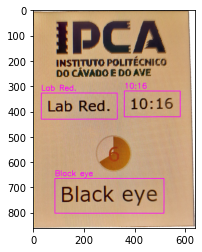

In [220]:
text_list = []
area_list = []

# Creating a copy of image
img_result = img_resized.copy()

for i, cnt in enumerate(contours):
    # Drawing a rectangle on copied image
    x, y, w, h = cv2.boundingRect(cnt)
    if(cv2.contourArea(cnt) < 70000.0):
        
        # Cropping the text block for giving input to OCR
        cropped = img_result[y:y+h, x:x+w]
        cv2.imwrite(f'crops/{i}.jpg', cropped)

        # Apply OCR on the cropped image
        text = pytesseract.image_to_string(cropped)
        if text :
            if(len(text) > 3 and len(text) < 20):
                rect = cv2.rectangle(img_result, (x, y), (x+w, y+h), (255, 0, 255), 2)
                # Write text next of boundingRect
                cv2.putText(img_result, text.strip(), (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 255), 2)
                print(f'{i}: {text.strip()}')
                text_list.append(text.strip())
                area = cv2.contourArea(cnt)
                area_list.append(area)

print(f'Text: {text_list}, List lenght: {len(text_list)}')
print(f'Area: {area_list}, List lenght: {len(text_list)}')
plt.imshow(img_result)   

In [15]:
# Create a copy of image
img_result = img_roi.copy()

# Get raw data from image
raw_data = pytesseract.image_to_data(img_result)
for count, data in enumerate(raw_data.splitlines()):
    # Exclude first row (column names)
    if count > 0:
        # Parse data to list
        data = data.split()
        # Check if there's text
        if len(data) == 12:
            # Get text coordinates
            x, y, w, h = int(data[6]), int(data[7]), int(data[8]), int(data[9])
            # Get text
            content = data[11]
            print(content)

# Loop Test 

In [221]:
words = ['Andromeda','Antennae','Backward','Black eye','Bodes','Butterfly','Chartwheel','Cigar','Circinus','Comet','Cosmos',
         'Eye of Sauron','Fireworks','Hockey Stick','Hoags','Magellanic','Lindsay','Malin 1','Medusa Meger','Mayalls',
         'Milky Way','Needle','Pinwheel','Sculptor','Sombrero','Sunflower','Tadpole','Triangulum','Whirlpool','Mercurio',
         'Venus','Terra','Marte','Jupiter','Saturno','Urano','Neptuno','Plutão','Sol','Lua']

#Directorio do Projeto (Escrever o directório do projeto)
os.chdir(r'C:\Users\Dasil\2. Processamento de Imagem e Visao por Computador\PIVC_TP')
#os.chdir(r'C:/Users/lemos/PIVC/')

directory = 'dataset/'

for file in os.listdir(directory):
    # Read image
    img = cv2.imread(os.path.join(directory, file))
    # Convert to gray
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Convert to binary
    _, img_th1 = cv2.threshold(img_gray, 0, 255, cv2.THRESH_OTSU)
    
    # Find biggest contour (screen)
    contours, _ = cv2.findContours(img_th1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    biggest_contour = max(contours, key=cv2.contourArea)
    
    # Get bounding box around screen
    x, y, w, h = cv2.boundingRect(biggest_contour)
    
    img2 = img.copy()

    # Color that will fill image
    fill_color = [255, 255, 255] # White
    mask_value = 255 # Can be any color, exept black (0)

    # Create stencil with the same dimensions as original image but only 1 channel
    stencil  = np.zeros(img2.shape[:-1]).astype(np.uint8)
    cv2.fillPoly(stencil, [biggest_contour], mask_value)

    # Select everything that is not mask_value
    selected = stencil != mask_value
    # Fill it with fill_color
    img2[selected] = fill_color


    img_roi = img2[y:y+h, x:x+w]

    
    # resize image
    img_resized = cv2.resize(img_roi, (640, 860), interpolation=cv2.INTER_AREA)
    # Convert to gray
    img_roi_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
    # Convert to binary
    _, img_th2 = cv2.threshold(img_roi_gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)

    # Create kernel for Erosion
    rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

    # Applying Erosion on the threshold image
    img_erode = cv2.erode(img_th2, rect_kernel)
    
    # Create kernel
    rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (63, 63))

    # Applying dilation on the threshold image
    img_dilated = cv2.dilate(img_erode, rect_kernel)

    flag = True
    i = 0
    
    # Finding contours
    while(flag):
        i += 1
        contours, _ = cv2.findContours(img_dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        if(len(contours) < 2):
            img_dilated = img_dilated[10:-50, 10:-20]
        else:
            flag = False
            
    text_list = []
    area_list = []
    
    contours, _ = cv2.findContours(img_dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Creating a copy of image
    img_result = img_resized.copy()

    for i, cnt in enumerate(contours):
        # Drawing a rectangle on copied image
        x, y, w, h = cv2.boundingRect(cnt)
        if(cv2.contourArea(cnt) < 70000.0):   

            # Cropping the text block for giving input to OCR
            img_analysis = cv2.bitwise_not(img_th2)
            cropped = img_analysis[y:y+h, x:x+w]
            cv2.imwrite(f'crops/{i}.jpg', cropped)

            # Apply OCR on the cropped image
            text = pytesseract.image_to_string(cropped)
            if text :
                if (len(text) > 3 and len(text) < 20):
                    #Draw Rectangle
                    rect = cv2.rectangle(img_result, (x, y), (x+w, y+h), (255, 0, 255), 2) 

                    # Write text next of boundingRect
                    cv2.putText(img_result, text.strip(), (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 255), 2)
                    text_list.append(text.strip())
                    area = cv2.contourArea(cnt)
                    area_list.append(area)                

    #Save Image of Screen
    cv2.imwrite(f'ARpics/{file}.jpg', img_result)